In [236]:
import warnings
import numpy as np
import numpy.linalg as la
import math as mt
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import sympy as sp
from IPython.display import display, Math
from sympy.parsing.sympy_parser import parse_expr

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# PUNTO 1

Escriba un polinomio $p(x)$ tal que $|sinc(x) − p(x)| ≤ 10^{-10}$ para $−0.2 ≤ x ≤ 0.2$, donde:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{sin(x)}x &   si  &  x\neq 0 \\
             \\ 1 &  si  & x =  0
             \end{array}
   \right.
$$
es la función "$sinc$" (usada en procesamiento de señales, etc). Muestre ademas que su polinomio p cumple la condición: $|sinc(x) − p(x)| ≤ 10^-10$ para $x ∈ [−0.2, 0.2]$, grafique los errores teoricos y reales.

In [237]:
x = sp.symbols("x")  # creamos la variable x
sinc = sp.Piecewise((sp.sin(x)/x, x!=0), 
                    (1, True))  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # orden de polinomio

In [238]:
p = sp.series(expr = sinc, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex


<IPython.core.display.Math object>

In [239]:
p = [sp.series(expr = sinc, x=x , x0=x0, n=ni).removeO() for ni in range(2,10)]

pol_deg = np.arange(1,(len(p)+1))

f_eval = sinc.subs(x, 0.1).evalf()
p_eval = [p_n.subs(x, 0.1).evalf() for p_n in p]

error_real = [np.abs(float(f_eval - p_eval[i])) for i in range(len(pol_deg))]

error_estimado = [((0.1)**(n+1))/(mt.factorial(n+1)) for n in pol_deg]

In [240]:
found_n = False
for i in range(len(error_real)):
    if error_real[i] <= 10**-10:
        print(f"El polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: \nPolinomio de orden n = {i+1}")
        found_n = True
        break
if not found_n:
    print("No hay polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2. Intente con más polinomios.")

print("\nValores estimados: ")
for i in range(len(error_estimado)):
    print(f"n = {i+1} es: {error_estimado[i]}")

print("\nValores reales: ")
for i in range(len(error_real)):
    print(f"n = {i+1} es: {error_real[i]}")

print(f"\npodemos ver que cuando n = 6 el valor es: {error_real[5]} ≤ 10^-10 ")

El polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: 
Polinomio de orden n = 6

Valores estimados: 
n = 1 es: 0.005000000000000001
n = 2 es: 0.00016666666666666672
n = 3 es: 4.166666666666668e-06
n = 4 es: 8.333333333333335e-08
n = 5 es: 1.3888888888888894e-09
n = 6 es: 1.984126984126985e-11
n = 7 es: 2.4801587301587314e-13
n = 8 es: 2.7557319223985903e-15

Valores reales: 
n = 1 es: 0.0016658335317184525
n = 2 es: 8.331349482526562e-07
n = 3 es: 8.331349482526562e-07
n = 4 es: 1.9838508613645445e-10
n = 5 es: 1.9838508613645445e-10
n = 6 es: 2.7644553313166398e-14
n = 7 es: 2.7644553313166398e-14
n = 8 es: 1.1102230246251565e-16

podemos ver que cuando n = 6 el valor es: 2.7644553313166398e-14 ≤ 10^-10 


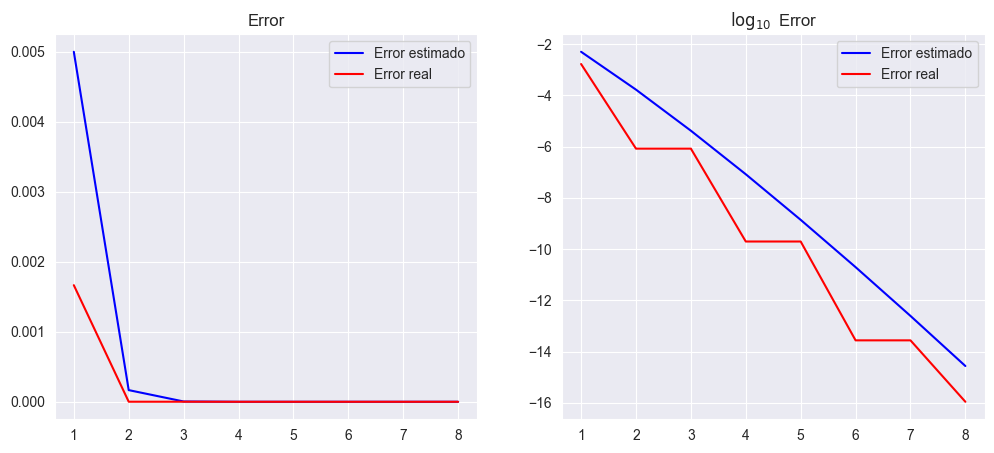

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_estimado,color='b')
ax1.plot(pol_deg,error_real, color ='r')
ax1.set_title('Error')
ax1.legend(['Error estimado', 'Error real'], prop={'size':10})

ax2.plot(pol_deg,np.log10(error_estimado),color='b')
ax2.plot(pol_deg,np.log10(error_real), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error estimado', 'Error real'], prop={'size':10});

# PUNTO 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier $f ∈ C4[a, b]$ tal que para $x_{0} ∈ (a,b)$ se tenga $O(h^3$). Luego, considere $f(x) = xln(x)$ y calcule $f′(1)$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error.

Por Taylor, nuestra función debe ser derivable hasta orden 4:

$f(x)=f(x_0)+f^{'}(x_0)(x-x_0)+f^{''}(x)\frac{(x-x_0)^{2}}{2!}+f^{'''}(x)\frac{(x-x_0)^{3}}{3!}+f^{''''}(c)\frac{(x-x_0)^{4}}{4!}$

Haciendo uso del Teorema de Taylor tenemos las siguientes igualdades para $x=x_0+kh$, con $k=1,2,3$ 
$$f(x_{0}+h)=f{\left(x_{0} \right)} + h f'(x_{0}) + \frac{h^{2}}{2}f''(x_{0}) + \frac{h^{3}}{6} f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+2h)=f{\left(x_{0} \right)} + 2 h f'(x_{0}) + 2 h^{2} f''(x_{0}) + \frac{4 h^{3}}{3}f'''(x_{0}) + O\left(h^{4}\right)
\\f(x_{0}+3h)=f{\left(x_{0} \right)} + 3 h f'(x_{0}) + \frac{9 h^{2}}{2}f''(x_{0}) + \frac{9 h^{3}}{2}f'''(x_{0}) + O\left(h^{4}\right)$$

Con lo anterior nos interesa encontrar una combinación lineal tal los terminos $f''$ y $f'''$ desaparezcan y que además se garantice que $f'$ se mantenga. Es decir que nos interesan encontrar constantes $a,b,c$ tales que se obtenga la siguiente combinación lineal
$$(a + 2b  + 3c ) f'(x_{0}) +  \left (\frac{a}{2} + 2 b+ \frac{9c }{2} \right ) f''(x_{0})  + \left (\frac{a}{6}  + \frac{4 b}{3} + \frac{9c}{2} \right )f'''(x_{0}) = f'(x_0)$$

In [242]:
coeff = np.array([
    [1, 2, 3],
    [1/2, 2, 9/2],
    [1/6, 4/3, 9/2]
])
# print(coeff_Matrix)
constants=la.solve(coeff,np.array([1,0,0]))
# print(constants)
a, b, c = constants

In [243]:
x,x0,h = sp.symbols('x,x0,h')
f = parse_expr('f(x)')
n=4

In [244]:
f1 =f.subs(x,x0+h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+h).simplify()
display(f1)
f2 =f.subs(x,x0+2*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+2*h).simplify()
display(f2)
f3 =f.subs(x,x0+3*h)-sp.series(expr=f,x=x,x0=x0,n=n).subs(x,x0+3*h).simplify()
display(f3)

f(h + x0) - f(x0) - h*Derivative(f(x0), x0) - h**2*Derivative(f(x0), (x0, 2))/2 - h**3*Derivative(f(x0), (x0, 3))/6 + O(h**4)

f(2*h + x0) - f(x0) - 2*h*Derivative(f(x0), x0) - 2*h**2*Derivative(f(x0), (x0, 2)) - 4*h**3*Derivative(f(x0), (x0, 3))/3 + O(h**4)

f(3*h + x0) - f(x0) - 3*h*Derivative(f(x0), x0) - 9*h**2*Derivative(f(x0), (x0, 2))/2 - 9*h**3*Derivative(f(x0), (x0, 3))/2 + O(h**4)

In [245]:
F0=a*f1+b*f2+c*f3
F1 = sp.nsimplify(F0,tolerance=10**-4,rational=True)

In [246]:
display(Math(sp.latex(F1).replace('\\left. \\frac{d}{d \\xi_{1}} f{\\left(\\xi_{1} \\right)} \\right|_{\\substack{ \\xi_{1}=x_{0} }}',"f'(x_{0})")+'=0'))

<IPython.core.display.Math object>

In [247]:
x = sp.Symbol('x')
f = x * sp.ln(x)    


x0 = 1  
h_values = [i for i in range(-10,0)]
h_pot = [10**i for i in range(-10,0)]
print(f"Valores de h: \n {h_pot}")

# elevamos 10^h para que los valores sea cercanos a cero
aprox_prog = [float(((3*f.subs(x, x0+4*h) - (32/3)*f.subs(x, x0 + 3*h) + 
                12*f.subs(x, x0+2*h) - (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot]  # formula progreiva

aprox_reg = [float(((-3*f.subs(x, x0-4*h) + (32/3)*f.subs(x, x0 - 3*h) 
                - 12*f.subs(x, x0-2*h) + (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot] # formula regresiva


print("aroximaciones progresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->   aproximacion: {aprox_prog[i]}")

print("\naproximaciones regresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->    aproximacion: {aprox_reg[i]}")

Valores de h: 
 [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
aroximaciones progresivas: 
h = 1e-10  ----->   aproximacion: 1.0000000827403719
h = 1e-09  ----->   aproximacion: 0.9999998421920492
h = 1e-08  ----->   aproximacion: 1.0000000179773614
h = 1e-07  ----->   aproximacion: 0.9999999981783847
h = 1e-06  ----->   aproximacion: 1.0000000001582823
h = 1e-05  ----->   aproximacion: 0.9999999999824994
h = 0.0001  ----->   aproximacion: 1.0000000000018892
h = 0.001  ----->   aproximacion: 1.0000000019895414
h = 0.01  ----->   aproximacion: 1.0000018962427373
h = 0.1  ----->   aproximacion: 1.0012400275654099

aproximaciones regresivas: 
h = 1e-10  ----->    aproximacion: 1.0000000827403699
h = 1e-09  ----->    aproximacion: 1.0000000919922305
h = 1e-08  ----->    aproximacion: 0.9999999846706713
h = 1e-07  ----->    aproximacion: 1.0000000015090518
h = 1e-06  ----->    aproximacion: 0.999999999908483
h = 1e-05  ----->    aproximacion: 1.000000000015802
h = 0.00

### errores

hallamos el error de las progresivas y regresivas con: 

$error = {|valor_{real} - errores_{realtivos}|}$

In [248]:
f_diff = sp.diff(f, x)  # se deriva f
df_real = float(f_diff.subs(x, x0).evalf())   # valor real que seria la derivada de f evaluada en 1
print(f"la derivada de la funcion es {f_diff}\n el valor real o f'(1) es: {df_real}")

la derivada de la funcion es log(x) + 1
 el valor real o f'(1) es: 1.0


In [249]:
error_prog = [(np.abs(df_real-df_prog)/df_real) for df_prog in aprox_prog]   # lista de errores progresivas
print(f"errores progresivas: \n{error_prog}")

errores progresivas: 
[8.274037188726879e-08, 1.578079508179897e-07, 1.7977361377319312e-08, 1.8216153030436999e-09, 1.5828227617475932e-10, 1.7500556559468805e-11, 1.8891554987021664e-12, 1.989541420499563e-09, 1.896242737275955e-06, 0.0012400275654098625]


In [250]:
error_reg = [(np.abs(df_real-df_reg)/df_real) for df_reg in aprox_reg]  # lista de errores regresivas
print(f"errores regresivas:\n{error_reg}")

errores regresivas:
[8.274036988886735e-08, 9.199223049982663e-08, 1.532932869530157e-08, 1.5090517724303254e-09, 9.15170161874812e-11, 1.5802026354094778e-11, 2.1116441928370477e-12, 2.0108411602492993e-09, 2.112568856516006e-06, 0.0037717483683460395]


el valor menor se encuentra en 1.8891554987021664e-12 y es cuando h = 10^-4


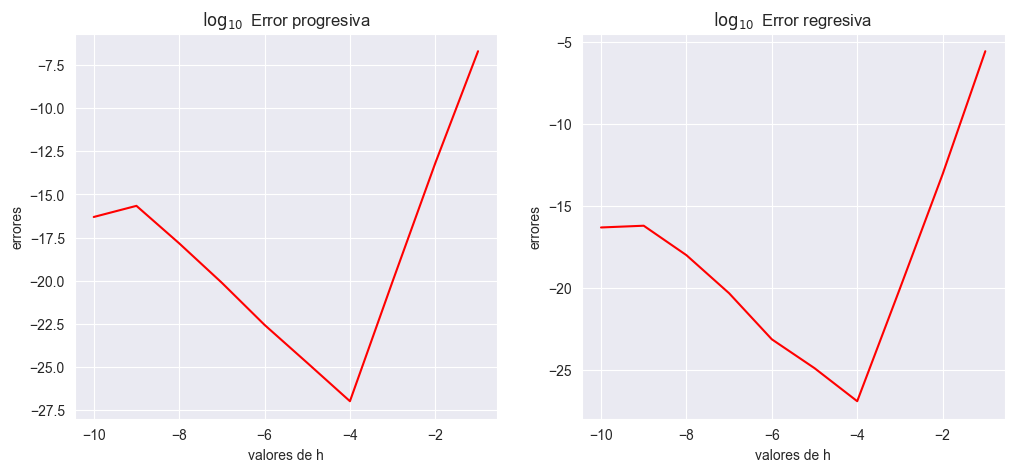

In [251]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(h_values,np.log(error_prog),color='r')
ax1.set_xlabel("valores de h")
ax1.set_ylabel("errores")
ax1.set_title('$\log_{10}$ Error progresiva');

ax2.plot(h_values,np.log(error_reg),color='r')
ax2.set_xlabel("valores de h")
ax2.set_ylabel("errores")
ax2.set_title('$\log_{10}$ Error regresiva');

print(f"el valor menor se encuentra en {min(error_prog)} y es cuando h = 10^-4")

# PUNTO 3
Considere la función: $f(x) = xsin(x)$ grafique en un solo lienzo a $f$ y los polinomios de Taylor
de grado $n = 1,2,...,6$ para: $x_0∈(−5π,5π)$.

In [252]:
x = sp.symbols("x")  # declaramos una variable
x_sinx = x*sp.sin(x)   # definimos la función

x0 = 0
n = 6

In [253]:
p = sp.series(expr= x_sinx, x=x, x0=x0, n=n)  # genera la serie de taylor de f
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [254]:
max_n = 10
p = [sp.series(expr = x_sinx, x0=x0, n=n).removeO() for n in range(4,max_n)]  
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [255]:
sns.set_style('whitegrid')
cmap = sns.color_palette('tab10', n_pol)

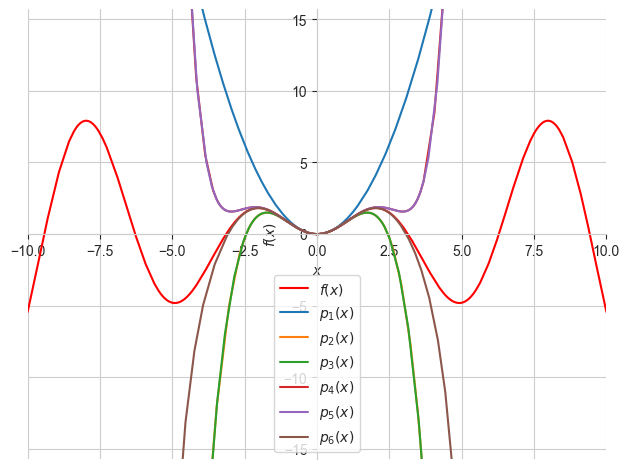

In [256]:
fig = pls.plot(x_sinx,xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()